# Análise de Integração ao SNT


## 1. Importação das Bibliotecas e Carregamento dos Dados

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
plt.style.use('seaborn')
sns.set_palette('Set2')
pd.set_option('display.max_columns', None)

/tmp/ipykernel_70942/1954984588.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [17]:
# Carregar os dados
df = pd.read_excel('analiseestatistica_indicadores2.xlsx')
print("Dimensões do dataset:", df.shape)
df.head()

Dimensões do dataset: (5570, 27)


,UF,Estado,codigo_ibge,Integrado ao SNT,Sinistros,Z-score Sinistros,População,Z-score população,Soma da Arrecadação 2018-2023,Z-score Arrecadação,PIB,Z-score PIB,PIB per capita,Z-score PIB per capita,Taxa de alfabetização +15 anos,Tx de Alfabetização +15 anos,Z-score Tx Afabetização,IDHM,Z-score IDHM,Taxa de Admissão em Empregos,300,Taxa de Óbitos/100 mil habitantes,Z-score Tx óbito/100 mil hab,% de Óbitos/Sinistros,Z-score Óbitos/Sinistros,area_km2,km_rodovias_federais
0,RO,Rondônia,1100015,Não,1102,-0.006384,21494,-0.072467,3.291565e+09,-0.076026,2.620769e+08,-0.058931,12193.024937,0.018950,91.59,0.9159,0.448016,0.641,-0.217690,0.509897,-0.094854,162.836140,1.001660,3.176044,-0.600753,7067.127,0.000000
1,RO,Rondônia,1100023,Sim,5622,0.453483,96833,0.292338,1.718637e+10,0.164665,1.364694e+09,0.090208,14093.271715,0.169636,94.08,0.9408,0.777358,0.702,0.567787,0.505000,-0.172360,171.429162,1.122970,2.952686,-0.607705,4426.143,77.806543
2,RO,Rondônia,1100031,Não,185,-0.099680,5351,-0.150634,1.672614e+09,-0.104070,6.961111e+07,-0.084964,13008.991590,0.083655,89.82,0.8982,0.213906,0.650,-0.101800,0.515403,-0.007693,224.257148,1.868761,6.486486,-0.497720,1314.352,0.000000
3,RO,Rondônia,1100049,Sim,5957,0.487566,86887,0.244178,1.279220e+10,0.088548,1.186494e+09,0.066105,13655.599698,0.134930,93.71,0.9371,0.728420,0.718,0.773814,0.511808,-0.064596,159.977902,0.961309,2.333389,-0.626980,3793.000,51.712641
4,RO,Rondônia,1100056,Não,732,-0.044028,15890,-0.099602,3.614702e+09,-0.070429,2.220212e+08,-0.064349,13972.384456,0.160050,92.15,0.9215,0.522085,0.692,0.439020,0.500262,-0.247362,195.091252,1.457016,4.234973,-0.567796,2783.297,29.154767


In [18]:

print(df[['area_km2', 'km_rodovias_federais']].isnull().sum())


area_km2                92
km_rodovias_federais    92
dtype: int64


In [19]:
df.dropna(inplace=True)


print(df[['area_km2', 'km_rodovias_federais']].isnull().sum())


area_km2                0
km_rodovias_federais    0
dtype: int64


## 2. Análise Exploratória dos Dados


In [20]:
# Verificar valores faltantes
missing_values = df.isnull().sum()
print("\nValores faltantes por coluna:")
print(missing_values[missing_values > 0])


Valores faltantes por coluna:
Series([], dtype: int64)


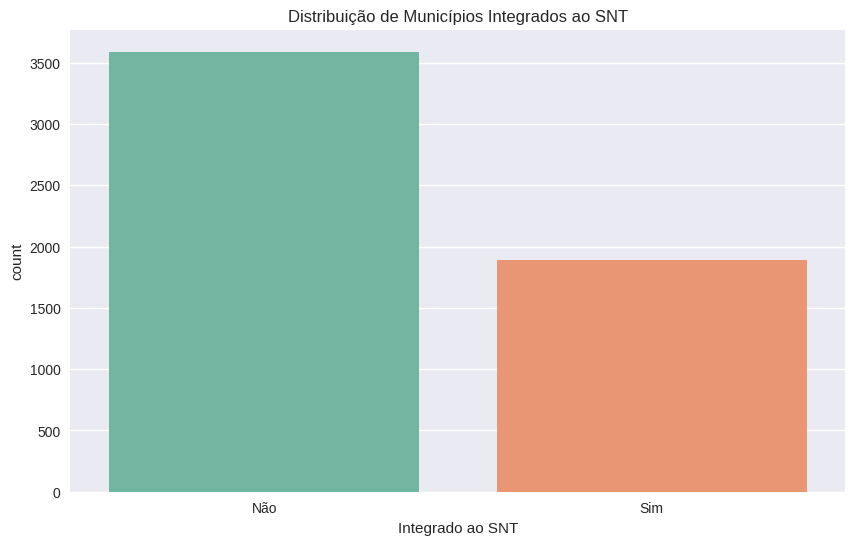


Percentual de municípios integrados:
Integrado ao SNT
Não    65.5
Sim    34.5
Name: proportion, dtype: float64


In [21]:
# Distribuição da variável6
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Integrado ao SNT')
plt.title('Distribuição de Municípios Integrados ao SNT')
plt.show()

print("\nPercentual de municípios integrados:")
print(df['Integrado ao SNT'].value_counts(normalize=True).round(3) * 100)

## 3. Preparação dos Dados e Modelagem

In [22]:
# Definir features (X) e target (y)
features = ['Sinistros','PIB per capita', 'Tx de Alfabetização +15 anos', 
           'Taxa de Admissão em Empregos', 'IDHM', 
           'Taxa de Óbitos/100 mil habitantes', '% de Óbitos/Sinistros','area_km2', 'km_rodovias_federais'
           ]

#'area_km2', 'km_rodovias_federais'

X = df[features]
y = df['Integrado ao SNT']
y = y.map({'Sim': 1, 'Não': 0}) 

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='median') # Imputação de valores faltantes
scaler = StandardScaler() # Normalização dos dados, padronizando a média e o desvio padrão

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [23]:
# Criar e treinar o modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Fazer predições
y_pred = rf_model.predict(X_test_scaled)

# Avaliar o modelo
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       718
           1       0.87      0.70      0.77       378

    accuracy                           0.86      1096
   macro avg       0.86      0.82      0.84      1096
weighted avg       0.86      0.86      0.85      1096



In [24]:
from imblearn.over_sampling import SMOTE

# Aplicando SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Treinando o modelo
rf_model = RandomForestClassifier(n_estimators=200, class_weight=None, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predição e avaliação
y_pred = rf_model.predict(X_test_scaled)

print("\nRelatório de Classificação após SMOTE:\n")
print(classification_report(y_test, y_pred))




Relatório de Classificação após SMOTE:

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       718
           1       0.80      0.78      0.79       378

    accuracy                           0.86      1096
   macro avg       0.84      0.84      0.84      1096
weighted avg       0.86      0.86      0.86      1096



In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Acurácia Média:", scores.mean())


Acurácia Média: 0.8603411380640728


## 4. Análise da Importância das Features

Vamos analisar quais características têm maior influência na integração ao SNT.

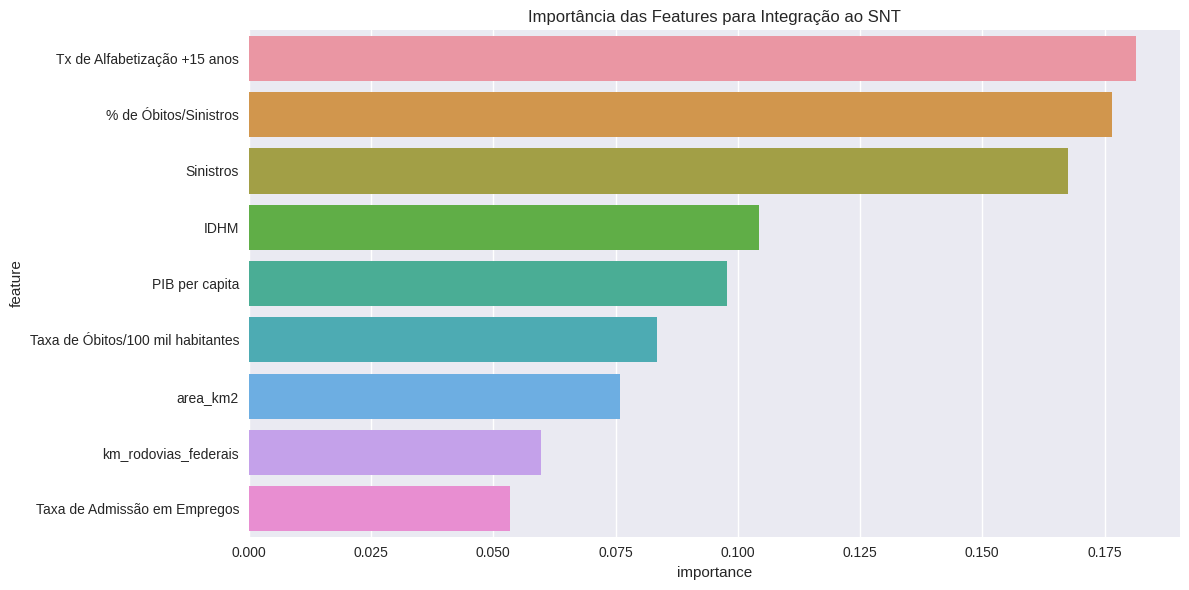


Importância das Features (%):

                             feature  importance
2       Tx de Alfabetização +15 anos       18.14
6              % de Óbitos/Sinistros       17.65
0                          Sinistros       16.74
4                               IDHM       10.43
1                     PIB per capita        9.79
5  Taxa de Óbitos/100 mil habitantes        8.36
7                           area_km2        7.58
8               km_rodovias_federais        5.98
3       Taxa de Admissão em Empregos        5.34


In [26]:
# Calcular e plotar importância das features
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importância das Features para Integração ao SNT')
plt.tight_layout()
plt.show()

print("\nImportância das Features (%):\n")
print(feature_importance.assign(importance=lambda x: x['importance']*100).round(2))

In [ ]:
#pip install shap


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
# import shap
# import matplotlib.pyplot as plt

# # Criar o objeto explainer a partir do modelo treinado
# explainer = shap.TreeExplainer(rf_model)

# # Calcular os valores SHAP (pode demorar um pouco dependendo do dataset)
# shap_values = explainer.shap_values(X)

# # Verificar a forma de shap_values e X
# print(f"Forma de shap_values: {len(shap_values)}")
# print(f"Forma de X: {X.shape}")

# # Se o modelo for multiclasse, shap_values terá uma lista de arrays, um para cada classe
# if isinstance(shap_values, list):
#     # Para cada classe no modelo multiclasse
#     for class_idx, class_shap_values in enumerate(shap_values):
#         plt.title(f"Impacto das Features para prever Classe {class_idx}")
#         shap.summary_plot(class_shap_values, X)
# else:
#     print("O modelo não é multiclasse ou a estrutura dos shap_values é diferente.")


## 3.2. Preparação dos Dados e Modelagem com Outlier

In [29]:
# # # Definir features (X) e target (y)
# features = ['Sinistros','PIB per capita', 'Tx de Alfabetização +15 anos', 
#            'Taxa de Admissão em Empregos', 'IDHM', 
#            'Taxa de Óbitos/100 mil habitantes',
#            'area_km2', 'km_rodovias_federais', '% de Óbitos/Sinistros','Soma da Arrecadação 2018-2023','População','PIB'] 

#overlayers 

# X = df[features]
# y = df['Integrado ao SNT']
# y = y.map({'Sim': 1, 'Não': 0}) 

# # Dividir os dados em treino e teste
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Criar pipeline de pré-processamento
# imputer = SimpleImputer(strategy='median')
# scaler = StandardScaler()

# # Aplicar imputer e scaler
# X_train_imputed = imputer.fit_transform(X_train)
# X_test_imputed = imputer.transform(X_test)
# X_train_scaled = scaler.fit_transform(X_train_imputed)
# X_test_scaled = scaler.transform(X_test_imputed)

In [30]:
# # Criar e treinar o modelo
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train_scaled, y_train)

# # Fazer predições
# y_pred = rf_model.predict(X_test_scaled)

# # Avaliar o modelo
# print("Relatório de Classificação:")
# print(classification_report(y_test, y_pred))

In [31]:
# from xgboost import XGBClassifier

# xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
# xgb_model.fit(X_train_scaled, y_train)
# y_pred_xgb = xgb_model.predict(X_test_scaled)

# print(classification_report(y_test, y_pred_xgb))


In [32]:
# from lightgbm import LGBMClassifier

# lgbm_model = LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
# lgbm_model.fit(X_train_scaled, y_train)
# y_pred_lgbm = lgbm_model.predict(X_test_scaled)

# print(classification_report(y_test, y_pred_lgbm))


## 4. Análise da Importância das Features

Vamos analisar quais características têm maior influência na integração ao SNT.

In [33]:
# # Calcular e plotar importância das features
# feature_importance = pd.DataFrame({
#     'feature': features,
#     'importance': rf_model.feature_importances_
# })
# feature_importance = feature_importance.sort_values('importance', ascending=False)

# plt.figure(figsize=(12, 6))
# sns.barplot(x='importance', y='feature', data=feature_importance)
# plt.title('Importância das Features para Integração ao SNT')
# plt.tight_layout()
# plt.show()

# print("\nImportância das Features (%):\n")
# print(feature_importance.assign(importance=lambda x: x['importance']*100).round(2))

## 5. Análise de Correlações

Vamos analisar como as diferentes variáveis se correlacionam entre si.

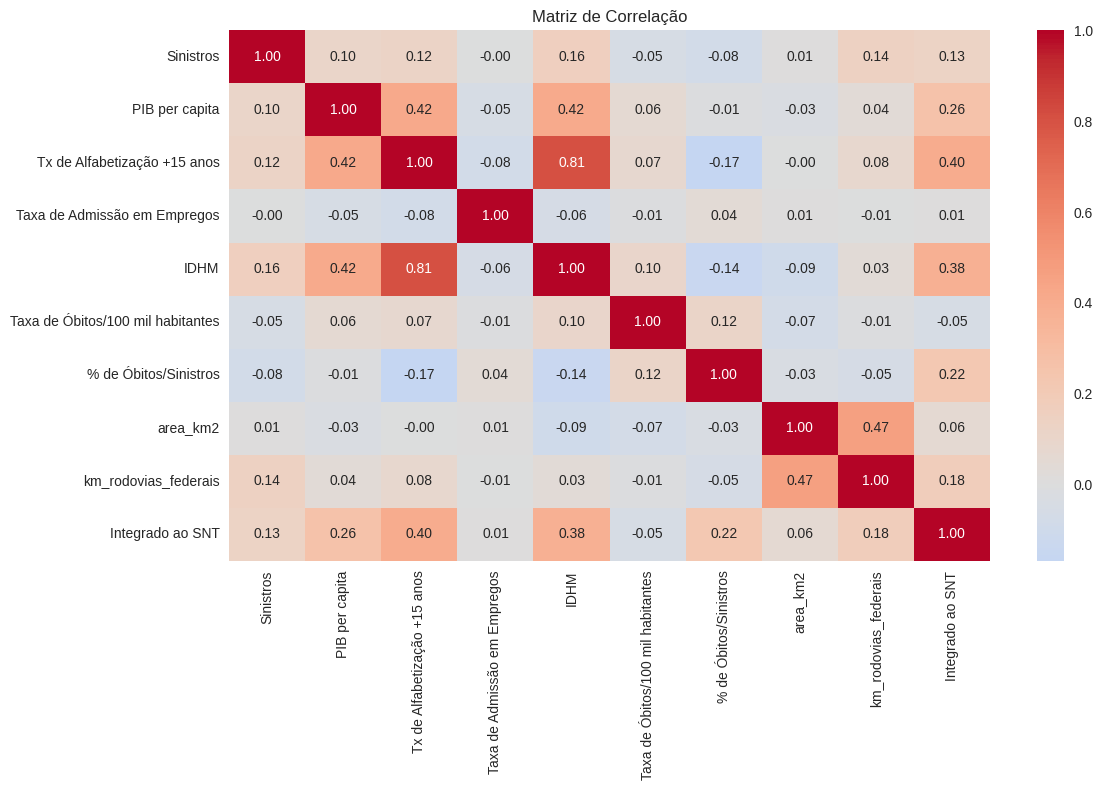

In [34]:
# Converter a coluna 'Integrado ao SNT' para numérica
df_corr = df.copy()
df_corr['Integrado ao SNT'] = df_corr['Integrado ao SNT'].map({'Sim': 1, 'Não': 0})

# Matriz de correlação
plt.figure(figsize=(12, 8))
correlation_matrix = df_corr[features + ['Integrado ao SNT']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

## 6. Conclusões

### Desempenho do Modelo
- O modelo alcançou uma acurácia geral de 81%
- Melhor desempenho na identificação de municípios NÃO integrados (90% de recall)
- Desempenho moderado na identificação de municípios integrados (61% de recall)

### Fatores mais Influentes
1. **Taxa de Alfabetização +15 anos (22.5%):**
   - Principal indicador para integração ao SNT
   - Sugere forte relação entre educação e capacidade de gestão do trânsito

2. **% de Óbitos/Sinistros (17.1%):**
   - Segunda característica mais importante
   - Indica que a severidade dos acidentes influencia a decisão de integração

3. **IDHM (14.0%):**
   - Terceiro fator mais relevante
   - Confirma a importância do desenvolvimento humano na gestão do trânsito

### Insights Principais
1. Fatores socioeconômicos (alfabetização, IDHM) têm maior peso que fatores de infraestrutura
2. A infraestrutura viária (km de rodovias) tem influência relativamente baixa (7.9%)
3. O modelo sugere que municípios com melhor desenvolvimento humano têm maior probabilidade de integração ao SNT

### Recomendações
1. Focar em programas educacionais para aumentar a taxa de alfabetização
2. Priorizar municípios com altas taxas de óbitos/sinistros para integração
3. Desenvolver políticas que considerem o IDHM no planejamento da integração ao SNT